<a href="https://colab.research.google.com/github/nischalbharathraj/employee_attrition-/blob/main/employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib scikit-learn pandas


In [ ]:
import pandas as pd

# Load the dataset (ensure you've uploaded the CSV file)


# Load dataset into pandas DataFrame
hr_data = pd.read_csv('/contentemployee_attrition_data.csv.csv')

# List of features and the target variable
features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
            'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
            'OverTime']

target = 'Attrition'  # Target variable for prediction

# Separate features (X) and target (y)
X = hr_data[features]
y = hr_data[target]



We are doing the train test split and finding the missing values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
# Separate categorical and numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = [col for col in X.columns if col not in num_cols]

# Numerical imputation using mean
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# Categorical imputation using the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])


Lable encoding and converting them into categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

le = LabelEncoder()
for var in cat_vars:
    X_train[var] = le.fit_transform(X_train[var])
    X_test[var] = le.transform(X_test[var])


random forest mechanism

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = clf.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Display classification report and confusion matrix
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

print('\nRandom Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.87

Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       255
         Yes       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294


Random Forest Confusion Matrix:
[[253   2]
 [ 35   4]]


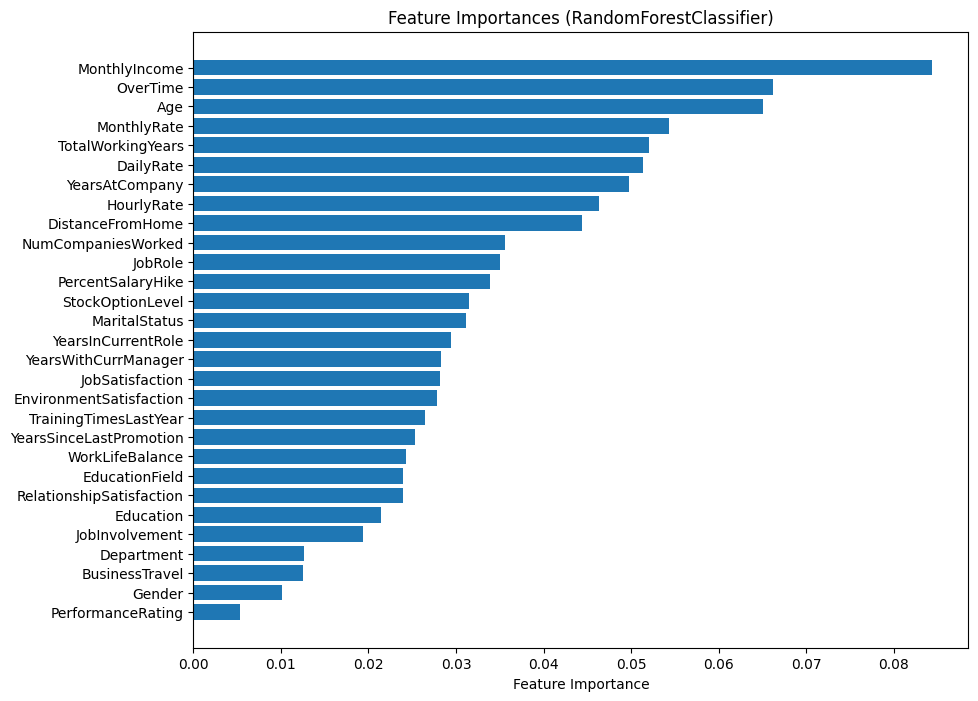

In [ ]:
import matplotlib.pyplot as plt

# Feature importance plot for Random Forest
feature_importances = clf.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances (RandomForestClassifier)')
plt.show()


KNN- classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train K-NN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Calculate accuracy for K-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-NN Accuracy: {accuracy_knn:.2f}')

# Display classification report and confusion matrix for K-NN
print('\nK-NN Classification Report:')
print(classification_report(y_test, y_pred_knn))

print('\nK-NN Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))


K-NN Accuracy: 0.85

K-NN Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.96      0.92       255
         Yes       0.31      0.13      0.18        39

    accuracy                           0.85       294
   macro avg       0.60      0.54      0.55       294
weighted avg       0.80      0.85      0.82       294


K-NN Confusion Matrix:
[[244  11]
 [ 34   5]]


we can observe that the random forest has > accuracy than knn

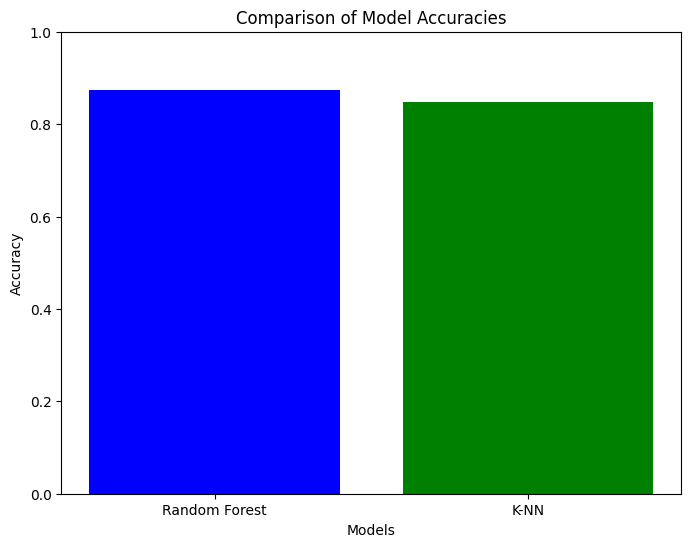

In [ ]:
# Compare Random Forest and K-NN accuracies
models = ['Random Forest', 'K-NN']
accuracies = [accuracy_rf, accuracy_knn]

# Plot comparison bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim([0, 1])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()
